NOTE: RUN STOCK DATA FIRST. IT IS LAST FEW CHUNKS OF CODE

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import datetime as dt
import sys
import os
import os

bs_data= pd.read_csv('bluesky_allkeywords.csv')
days = list(bs_data.columns)[1:]
td_data = pd.read_csv('bluesky_ticker.csv')

#Function to test if a date is a trading day
def is_trading_day(date):
    return date in stock_data.index


def next_trading_day(day):
    date = dt.datetime.strptime(day, '%Y-%m-%d')
    next_day = date + dt.timedelta(1)
    max_lookahead = 365  # prevent infinite loop going 1 year ahead
    count = 0
    while not is_trading_day(next_day):
        next_day += dt.timedelta(1)
        count += 1
        if count > max_lookahead:
            raise ValueError("No trading day found within 1 year from start date")
    return next_day.strftime('%Y-%m-%d')

for day in days:
   if is_trading_day(day) == False:
       bs_data[next_trading_day(day)] = bs_data[day] + bs_data[next_trading_day(day)]
       bs_data = bs_data.drop(columns=[day])
       td_data[day] = td_data[day] + td_data[next_trading_day(day)]
       td_data = td_data.drop(columns=[day])

sd =stock_data
match_stock_data = sd['2024-07-31': '2025-07-30']
match_sd_pct_change = match_stock_data.pct_change()
match_sd_pct_change = match_sd_pct_change.drop('2024-07-31')
bs_data= bs_data.drop(bs_data.columns[0], axis=1)
td_data = td_data.drop(td_data.columns[0], axis =1)
bs_data.index = sp500_tickers
td_data.index = sp500_tickers

In [29]:
# Y = # social media posts about a company, X = daily stock return
import matplotlib.pyplot as plt
company = 'AMZN'
x = match_sd_pct_change
y=bs_data.T


day_forward =  stock_data['2024-08-01': '2025-07-31']
pct_day_forward = day_forward.pct_change()
pct_day_forward = pct_day_forward.drop('2024-08-01')
x2= pct_day_forward

week_after = weekly_variance['2024-08-08': '2025-08-06']
x3 = week_after
month_after = monthly_variance['2024-09-01': '2025-09-03']
x4 = month_after

print(y[:-1].shape)
print(weekly_variance.head())

(248, 50)
Ticker           WMT      AMZN      AAPL       CVS      TSLA     GOOGL  \
Date                                                                     
2023-01-10  0.000185  0.000615  0.000292  0.000127  0.001386  0.000211   
2023-01-11  0.000194  0.000891  0.000322  0.000127  0.001210  0.000403   
2023-01-12  0.000220  0.000428  0.000234  0.000087  0.000682  0.000210   
2023-01-13  0.000077  0.000413  0.000068  0.000057  0.000881  0.000209   
2023-01-17  0.000051  0.000880  0.000064  0.000055  0.001212  0.000290   

Ticker          META       JPM      COST        KR  ...      CSCO         T  \
Date                                                ...                       
2023-01-10  0.000235  0.000082  0.001135  0.000050  ...  0.000258  0.000200   
2023-01-11  0.000241  0.000080  0.001138  0.000081  ...  0.000250  0.000189   
2023-01-12  0.000254  0.000083  0.001027  0.000080  ...  0.000165  0.000195   
2023-01-13  0.000250  0.000128  0.000046  0.000064  ...  0.000029  0.000159 

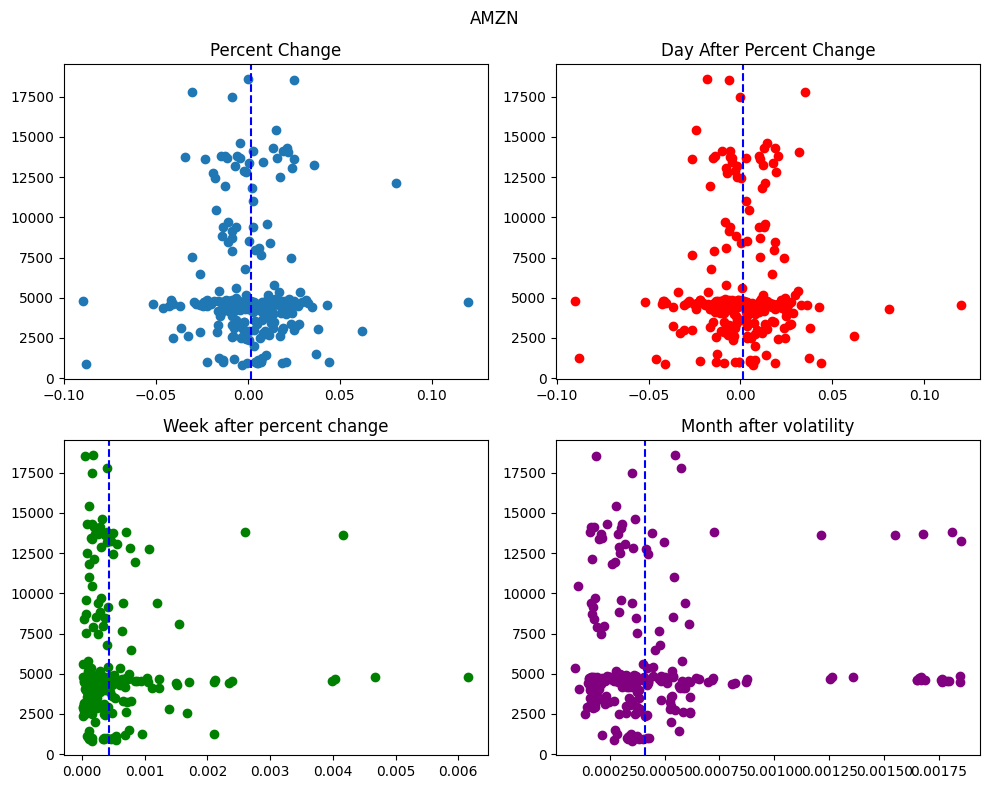

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8)) 
fig.suptitle(company)
# Plot 1
axs[0, 0].scatter(x[company], y[company])
axs[0, 0].axvline(x=av_pct_change[company], color='b', linestyle='--', label = "super average")
axs[0, 0].set_title('Percent Change')

# Plot 2
axs[0, 1].scatter(x2[company], y[company], color = 'red')
axs[0, 1].axvline(x=av_pct_change[company], color='b', linestyle='--', label = "super average")
axs[0, 1].set_title('Day After Percent Change')

# Plot 3
axs[1, 0].scatter(x3[company], y[company], color = 'green')
axs[1, 0].axvline(x=av_weekly_variance[company], color='b', linestyle='--', label = "super average")
axs[1, 0].set_title('Week after volatility')


# Plot 4
axs[1, 1].scatter(x4[company], y[:-1][company], color = 'purple')
axs[1, 1].axvline(x=av_monthly_variance[company], color='b', linestyle='--', label = "super average")
axs[1, 1].set_title('Month after volatility')

plt.tight_layout()
plt.show()


(240, 50)
(240, 50)


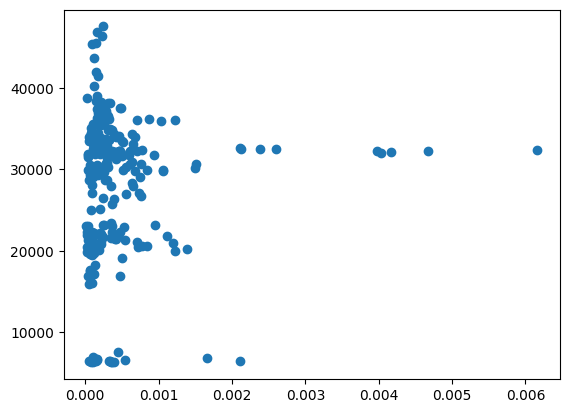

In [ ]:
#Experiment with weekly counts of posts vs weekly variance
bs_weekly = bs_data.T.rolling(window=5).sum()
bs_weekly = bs_weekly.iloc[4:]
instant_weekly = weekly_variance['2024-08-07': '2025-07-30']

#biweekly vs biweekly variance
bs_biweekly = bs_data.T.rolling(window=10).sum()
bs_biweekly = bs_biweekly.iloc[9:]
instant_biweekly = biweekly_variance['2024-08-14':'2025-07-30']


print(bs_biweekly.shape)
print(instant_biweekly.shape)

#plt.scatter(z[company],y2[company])
#plt.set_title('Monthly post count vs monthly variance')





C:\Users\Thisu\AppData\Local\Temp\ipykernel_6172\2113789320.py:2: DtypeWarning: Columns (11,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  elon_data= pd.read_csv('all_musk_posts.csv')
[*********************100%***********************]  1 of 1 completed

RangeIndex(start=0, stop=240, step=1)


Text(0.5, 1.0, 'Weekly Elon vs Weekly variance')

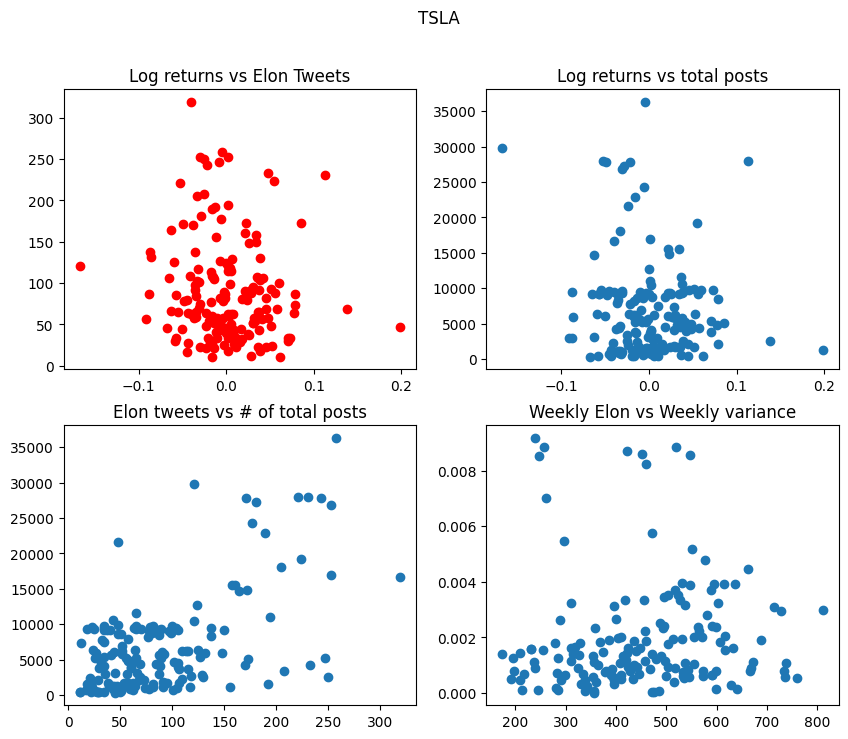

In [58]:
#study with TSLA and Elon Musk Tweets
elon_data= pd.read_csv('all_musk_posts.csv')
elon_data = elon_data["createdAt"]
elon_data = pd.to_datetime(elon_data)
elon_data = elon_data.dt.date
elon_data = elon_data.value_counts().sort_index()
elon_data = elon_data.reset_index()
elon_data.columns = ['date', 'tweets']
elon_data = elon_data.sort_values(by='date')
#Restrict to tweet counts from 2024-08-01 to 2025-03-31
elon_data = elon_data[(elon_data['date'] >= dt.date(2024, 8, 1)) & (elon_data['date'] <= dt.date(2025, 3, 28))]
elon_data = elon_data.set_index('date')
elon_data = elon_data.asfreq('D', fill_value=0)
elon_data = elon_data.reset_index()
print(elon_data.index)

TSLA_stock = yf.download('TSLA', '2024-07-31', '2025-03-29', auto_adjust=True)['Close']

tsla_log_returns = np.log(TSLA_stock/TSLA_stock.shift(1)).dropna()
tsla_dates = TSLA_stock.index


# Combine tweet counts on non-trading days to the next trading day, and delete non-trading days
def is_trading_day(day):
    return day in tsla_dates


def next_trading_day(day):
    date = day #dt.datetime.strptime(day, '%Y-%m-%d')
    next_day = date + dt.timedelta(1)
    max_lookahead = 365  # prevent infinite loop going 1 year ahead
    count = 0
    while not is_trading_day(next_day.strftime('%Y-%m-%d')):
        next_day += dt.timedelta(1)
        count += 1
        if count > max_lookahead:
            print(day)
            raise ValueError("No trading day found within 1 year from start date")
    return next_day#.strftime('%Y-%m-%d')


elon_data['date'] = elon_data['date'].dt.date
days = elon_data['date']

elon_data.set_index('date', inplace=True)
elon_data = elon_data.T

for day in days:
   if is_trading_day(day.strftime('%Y-%m-%d')) == False:
      elon_data[next_trading_day(day)] = elon_data[day] + elon_data[next_trading_day(day)]
      elon_data= elon_data.drop(columns=[day])



elon_data = elon_data.T

y=bs_data.T

y = y['2024-08-01': '2025-03-28']


elon_data_weekly = elon_data.rolling(window=5).sum()
elon_data_weekly= elon_data_weekly.iloc[4:]
weekly_variance = weekly_variance['2024-08-07': '2025-03-28']

fig, axs = plt.subplots(2,2, figsize=(10, 8)) 
fig.suptitle('TSLA')
# Plot 1
axs[0,0].scatter(tsla_log_returns["TSLA"], elon_data['tweets'], color = 'red')
axs[0,0].set_title('Log returns vs Elon Tweets')

# Plot 2
axs[0,1].scatter(tsla_log_returns["TSLA"], y['TSLA'] )
axs[0,1].set_title('Log returns vs total posts')

axs[1,0].scatter(elon_data['tweets'], y["TSLA"])
axs[1,0].set_title('Elon tweets vs # of total posts')

axs[1,1].scatter(elon_data_weekly['tweets'], weekly_variance['TSLA'])
axs[1,1].set_title('Weekly Elon vs Weekly variance')

In [24]:
#Stock data 
#RUN FIRST THEN TRY NOT TO TOUCH AFTER RUNNING
import yfinance as yf
import numpy as np

sp500_tickers = ["WMT", "AMZN", "AAPL", "CVS", "TSLA", "GOOGL", "META", "JPM", "COST", "KR",
"WBA", "TGT", "UPS", "CNC", "CI", "MSFT", "VZ", "IBM", "UNH", "XOM",
"MCK", "CVX", "CAH", "HD", "WBA", "MPC", "COR", "F", "C", "DELL",
"GM", "NVDA", "PFE", "PG", "CMCSA", "JNJ", "WFC", "BAC", "ABBV", "SBUX",
"CSCO", "T", "PEP", "INTC", "DIS", "BA", "GS", "MS", "HON", "CRM"
]

# Get the data for tickers from yahoo finance

# Download Close price data for tickers
stock_data_unordered = yf.download(sp500_tickers, '2023-01-01', '2025-10-02', auto_adjust=True)['Close']

# Download S&P 500 index data
SP500 = yf.download('^GSPC', '2023-01-01', '2025-10-02', auto_adjust=True)['Close']

# Transpose stock data so tickers are row index
stock_data_unordered = stock_data_unordered.T

# Reorder rows by original ticker list order
stock_data = stock_data_unordered.loc[sp500_tickers]
stock_data = stock_data.T


[*********************100%***********************]  49 of 49 completed
[*********************100%***********************]  1 of 1 completed


In [25]:
#log returns
log_returns= np.log(stock_data/stock_data.shift(1)).dropna()
SP_log_returns = np.log(SP500/SP500.shift(1)).dropna()

#Percentage change in stock returns day-to-day (in lieu of trading day variance)
SP_pct_change = SP500.pct_change().dropna()
sd2 = stock_data
pct_change = sd2.pct_change().dropna()
#print(pct_change)
#variance of stock returns over each week in the period (5 trading days) 
SP_weekly_variance = SP_log_returns.rolling(window=5).var().dropna()
weekly_variance = log_returns.rolling(window=5).var().dropna()

#variance of stock returns over each month in the period (21 trading days)
SP_monthly_variance = SP_log_returns.rolling(window=21).var().dropna()
monthly_variance = log_returns.rolling(window=21).var()

#variance of stock returns over each 2 weeks in the period (10 trading days)
SP_biweekly_variance = SP_log_returns.rolling(window=10).var().dropna()
biweekly_variance = log_returns.rolling(window=10).var().dropna()

#super averages
#average percent change in a single day
Av_SP_pct_change = SP_pct_change.mean()
transpose_pct_change = pct_change.T
av_pct_change = transpose_pct_change.mean(axis=1)
#print(av_pct_change)

#average weekly variance
av_weekly_variance = weekly_variance.mean()
Av_SP_weekly_variance = SP_weekly_variance.T.mean()
#average monthly variance
transpose_monthly = monthly_variance
av_monthly_variance = transpose_monthly.mean()

Av_SP_monthly_variance = SP_monthly_variance.T.mean()
#average biweekly variance
av_biweekly_variance = biweekly_variance.mean()
Av_SP_biweekly_variance = SP_biweekly_variance.T.mean()


#Note: variance windows are in trading days, not calendar days. Moreover, these are backwards looking rolling variances.
weekly_variance.head()

C:\Users\Thisu\AppData\Local\Temp\ipykernel_12640\252506122.py:8: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  pct_change = sd2.pct_change().dropna()


Ticker,WMT,AMZN,AAPL,CVS,TSLA,GOOGL,META,JPM,COST,KR,...,CSCO,T,PEP,INTC,DIS,BA,GS,MS,HON,CRM
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-10,0.000185,0.000615,0.000292,0.000127,0.001386,0.000211,0.000235,0.000082,0.001135,0.000050,...,0.000258,0.000200,0.000191,0.000380,0.000175,0.000779,0.000113,0.000122,0.000471,0.000797
2023-01-11,0.000194,0.000891,0.000322,0.000127,0.001210,0.000403,0.000241,0.000080,0.001138,0.000081,...,0.000250,0.000189,0.000193,0.000305,0.000063,0.000497,0.000145,0.000118,0.000379,0.000898
2023-01-12,0.000220,0.000428,0.000234,0.000087,0.000682,0.000210,0.000254,0.000083,0.001027,0.000080,...,0.000165,0.000195,0.000205,0.000192,0.000145,0.000631,0.000009,0.000051,0.000128,0.000653
2023-01-13,0.000077,0.000413,0.000068,0.000057,0.000881,0.000209,0.000250,0.000128,0.000046,0.000064,...,0.000029,0.000159,0.000031,0.000105,0.000212,0.000362,0.000011,0.000032,0.000040,0.000664
2023-01-17,0.000051,0.000880,0.000064,0.000055,0.001212,0.000290,0.000318,0.000219,0.000018,0.000157,...,0.000091,0.000161,0.000050,0.000183,0.000219,0.000285,0.001323,0.000438,0.000185,0.000340
